<a href="./data_preprosessing.ipynb" target="_self">
  <button style="
    padding:10px 18px;
    font-size:16px;
    background-color:#2563eb;
    color:white;
    border:none;
    border-radius:8px;
    cursor:pointer;">
    ➡️ Go to Data Preprocessing
  </button>
</a>


In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Hotel Booking Cancellation Prediction\Log\data_loader.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Hotel Booking Cancellation Prediction\Data\Raw_Data\hotel_bookings_updated_2024.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,16:40.9,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,56:21.5,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,46:25.7,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07:10.1,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,27:32.5,Lucknow


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'city']


| Column                         | Qisqa izoh                                                |
| ------------------------------ | --------------------------------------------------------- |
| hotel                          | Mehmonxona nomi yoki turi                                 |
| is_canceled                    | Buyurtma bekor qilinganmi (1 = ha, 0 = yo‘q)              |
| lead_time                      | Buyurtma va kelish sanasi orasidagi kunlar soni           |
| arrival_date_year              | Kelish yili                                               |
| arrival_date_month             | Kelish oyi                                                |
| arrival_date_week_number       | Kelish haftasining raqami                                 |
| arrival_date_day_of_month      | Kelish kunining raqami                                    |
| stays_in_weekend_nights        | Dam olish kunlari kechalar soni                           |
| stays_in_week_nights           | Ish kunlari kechalar soni                                 |
| adults                         | Kattalar soni                                             |
| children                       | Bolalar soni                                              |
| babies                         | Chaqlar soni                                              |
| meal                           | Taom rejasi (BB, HB, FB va hk.)                           |
| country                        | Mijozning mamlakati                                       |
| market_segment                 | Bozor segmenti (Online, Corporate va hk.)                 |
| distribution_channel           | Buyurtma kanali (Direct, TA/TO va hk.)                    |
| is_repeated_guest              | Takroriy mehmon (1 = ha, 0 = yo‘q)                        |
| previous_cancellations         | Oldingi bekor qilingan buyurtmalar soni                   |
| previous_bookings_not_canceled | Oldingi bekor qilinmagan buyurtmalar soni                 |
| reserved_room_type             | Buyurtma qilingan xona turi                               |
| assigned_room_type             | Tayinlangan xona turi                                     |
| booking_changes                | Buyurtma o‘zgarishlari soni                               |
| deposit_type                   | Oldindan to‘lov turi (No Deposit, Refundable, Non Refund) |
| agent                          | Buyurtmani qo‘shgan agent IDsi                            |
| company                        | Buyurtmani qo‘shgan kompaniya IDsi                        |
| days_in_waiting_list           | Kutish ro‘yxatidagi kunlar soni                           |
| customer_type                  | Mijoz turi (Transient, Contract, Group va hk.)            |
| adr                            | O‘rtacha kunlik narx (Average Daily Rate)                 |
| required_car_parking_spaces    | Talab qilingan avtoturargoh joylari soni                  |
| total_of_special_requests      | Maxsus talablar soni                                      |
| reservation_status             | Buyurtma holati (Check-Out, Canceled, No-Show)            |
| reservation_status_date        | Buyurtma holati sanasi                                    |
| city                           | Shahar nomi                                               |


# Unikal mehmonxona turlarini hisoblash

In [9]:
import pandas as pd
import plotly.graph_objects as go

city_hotel_table = (
    df.groupby('city')['hotel']
    .apply(lambda x: ', '.join(sorted(x.astype(str).unique())))
    .reset_index(name='hotel_names')
)

fig = go.Figure(data=[go.Table(
    header=dict(
        values=['City', 'Hotel nomlari'],
        fill_color='lightgrey',
        align='left'
    ),
    cells=dict(
        values=[city_hotel_table['city'], city_hotel_table['hotel_names']],
        align='left'
    )
)])

fig.update_layout(title='Har bir city bo‘yicha mehmonxona nomlari')
fig.show()


# Eng ko'p  va Eng kam buyurtma qabul qilgan mehmonxona

In [11]:
import pandas as pd
import plotly.graph_objects as go

# Hotel bo‘yicha buyurtmalar soni
hotel_orders = (
    df.groupby('hotel')
    .size()
    .reset_index(name='total_orders')
)

# Eng ko‘p va eng kam
max_hotel = hotel_orders.loc[hotel_orders['total_orders'].idxmax()]
min_hotel = hotel_orders.loc[hotel_orders['total_orders'].idxmin()]

# Plotly bar chart (faqat 2 ta bar)
fig = go.Figure()

fig.add_bar(
    x=[max_hotel['hotel']],
    y=[max_hotel['total_orders']],
    name='ENG KO‘P buyurtma'
)

fig.add_bar(
    x=[min_hotel['hotel']],
    y=[min_hotel['total_orders']],
    name='ENG KAM buyurtma'
)

fig.update_layout(
    title='ENG KO‘P va ENG KAM buyurtma qabul qilgan mehmonxonalar',
    xaxis_title='Mehmonxona',
    yaxis_title='Buyurtmalar soni'
)

fig.show()


# ENG KO‘P Buyurtmalar bekor qilingan mehmonxona

In [14]:
import pandas as pd
import plotly.express as px

# Faqat bekor qilingan buyurtmalar
canceled_df = df[df['is_canceled'] == 1]

# Hotel bo‘yicha bekor qilingan buyurtmalar soni
hotel_cancel = (
    canceled_df.groupby('hotel')
    .size()
    .reset_index(name='canceled_orders')
)

# Eng ko‘p bekor qilingan
most_canceled = hotel_cancel.loc[
    hotel_cancel['canceled_orders'].idxmax()
]

print("ENG KO‘P bekor qilingan buyurtma:")
print("Mehmonxona:", most_canceled['hotel'])
print("Bekor qilingan buyurtmalar soni:", most_canceled['canceled_orders'])

fig = px.bar(
    hotel_cancel.sort_values(
        by='canceled_orders', ascending=False
    ).head(1),
    x='hotel',
    y='canceled_orders',
    text='canceled_orders',
    title='ENG KO‘P buyurtma bekor qilingan mehmonxona',
    labels={
        'hotel': 'Mehmonxona',
        'canceled_orders': 'Bekor qilingan buyurtmalar soni'
    }
)

fig.show()


ENG KO‘P bekor qilingan buyurtma:
Mehmonxona: City Hotel - Ahmedabad
Bekor qilingan buyurtmalar soni: 2285


# ENG KAM bekor qilingan buyurtmaga ega MEHMONXONA

In [15]:
import pandas as pd
import plotly.express as px

# Faqat bekor qilingan buyurtmalar
canceled_df = df[df['is_canceled'] == 1]

# Hotel bo‘yicha bekor qilingan buyurtmalar soni
hotel_cancel = (
    canceled_df.groupby('hotel')
    .size()
    .reset_index(name='canceled_orders')
)

# ENG KAM bekor qilingan (0 dan katta bo‘lganlar ichidan)
least_canceled = hotel_cancel.loc[
    hotel_cancel['canceled_orders'].idxmin()
]

print("ENG KAM bekor qilingan buyurtma:")
print("Mehmonxona:", least_canceled['hotel'])
print("Bekor qilingan buyurtmalar soni:", least_canceled['canceled_orders'])

fig = px.bar(
    pd.DataFrame([least_canceled]),
    x='hotel',
    y='canceled_orders',
    text='canceled_orders',
    title='ENG KAM buyurtma bekor qilingan mehmonxona',
    labels={
        'hotel': 'Mehmonxona',
        'canceled_orders': 'Bekor qilingan buyurtmalar soni'
    }
)

fig.show()



ENG KAM bekor qilingan buyurtma:
Mehmonxona: Resort Hotel - Lucknow
Bekor qilingan buyurtmalar soni: 711


# ENG KO‘P va ENG KAM buyurtma bergan mamlakatlar

In [17]:
import pandas as pd
import plotly.graph_objects as go

# Country bo‘yicha buyurtmalar soni
country_orders = (
    df.groupby('country')
    .size()
    .reset_index(name='total_orders')
)

# ENG KO‘P va ENG KAM buyurtma
max_country = country_orders.loc[country_orders['total_orders'].idxmax()]
min_country = country_orders.loc[country_orders['total_orders'].idxmin()]

# Plotly bar chart
fig = go.Figure()

# ENG KO‘P buyurtma
fig.add_bar(
    x=[max_country['country']],
    y=[max_country['total_orders']],
    name='ENG KO‘P buyurtma',
    text=[max_country['total_orders']],
    textposition='outside'
)

# ENG KAM buyurtma
fig.add_bar(
    x=[min_country['country']],
    y=[min_country['total_orders']],
    name='ENG KAM buyurtma',
    text=[min_country['total_orders']],
    textposition='outside'
)

fig.update_layout(
    title='ENG KO‘P va ENG KAM buyurtma bergan mamlakatlar',
    xaxis_title='Mamlakat',
    yaxis_title='Buyurtmalar soni',
    yaxis=dict(showgrid=True),
    barmode='group'
)

fig.show()


# Mijoz turlari soni

Mijoz turlari soni:
customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64


C:\maya_temp\ipykernel_412\3955887805.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='Set2')


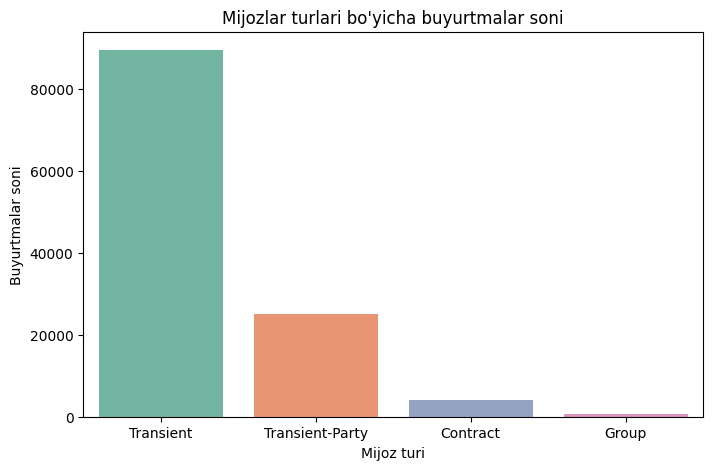

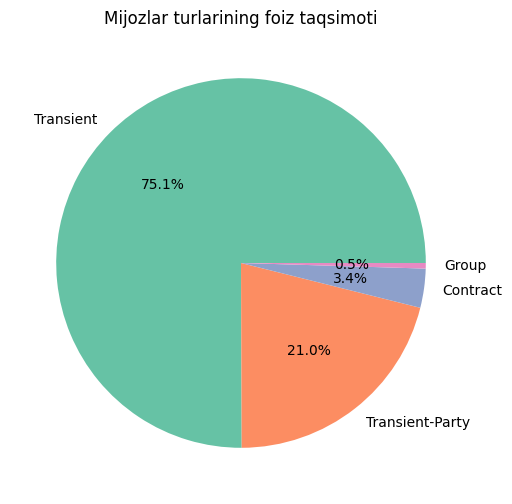

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mijoz turlarini sanash
customer_counts = df['customer_type'].value_counts()
print("Mijoz turlari soni:")
print(customer_counts)

# Vizualizatsiya (bar plot)
plt.figure(figsize=(8,5))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='Set2')
plt.title("Mijozlar turlari bo'yicha buyurtmalar soni")
plt.ylabel("Buyurtmalar soni")
plt.xlabel("Mijoz turi")
plt.show()

# Pie chart orqali ham vizualizatsiya
plt.figure(figsize=(6,6))
plt.pie(customer_counts.values, labels=customer_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Mijozlar turlarining foiz taqsimoti")
plt.show()


| Mijoz turi      | Qisqa izoh                                                                              |
| --------------- | --------------------------------------------------------------------------------------- |
| Transient       | Yakka mehmon (individual) buyurtma qilganlar                                            |
| Transient-Party | Yakka mehmon, lekin bir necha kishi bilan birga (party) buyurtma qilganlar              |
| Contract        | Korporativ yoki kompaniya shartnomasi orqali buyurtma qilganlar                         |
| Group           | Guruh sifatida buyurtma qilganlar (masalan, konferensiya yoki ko‘p xonali rezervatsiya) |


# To'lov turlari soni

To'lov turlari soni:
deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64


C:\maya_temp\ipykernel_412\1074300590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deposit_counts.index, y=deposit_counts.values, palette='pastel')


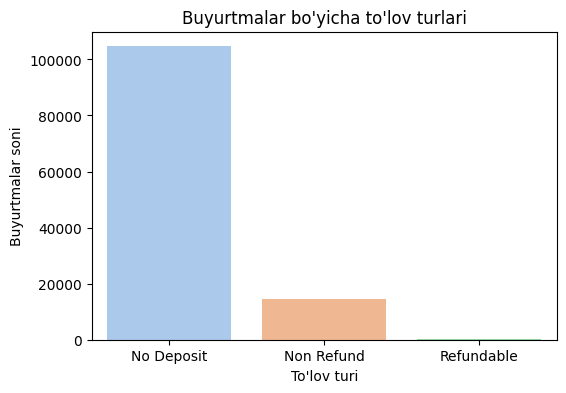

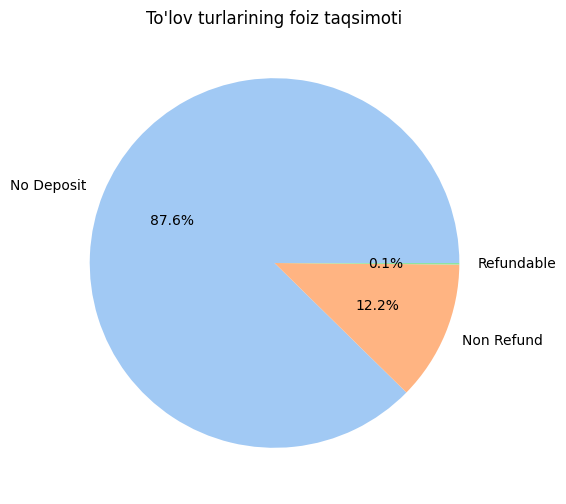

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To'lov turlari bo'yicha buyurtmalar soni
deposit_counts = df['deposit_type'].value_counts()
print("To'lov turlari soni:")
print(deposit_counts)

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=deposit_counts.index, y=deposit_counts.values, palette='pastel')
plt.title("Buyurtmalar bo'yicha to'lov turlari")
plt.ylabel("Buyurtmalar soni")
plt.xlabel("To'lov turi")
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(deposit_counts.values, labels=deposit_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("To'lov turlarining foiz taqsimoti")
plt.show()


# Shaharlar bo'yicha buyurtmalar soni

Shaharlar bo'yicha buyurtmalar soni:
city
Bhopal        8104
Jaipur        8038
Ahmedabad     8028
Pune          7992
Hyderabad     7981
Delhi         7978
Chandigarh    7978
Kolkata       7976
Goa           7973
Mumbai        7935
Chennai       7925
Bangalore     7897
Kochi         7889
Lucknow       7869
Indore        7827
Name: count, dtype: int64


C:\maya_temp\ipykernel_412\3149970760.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')


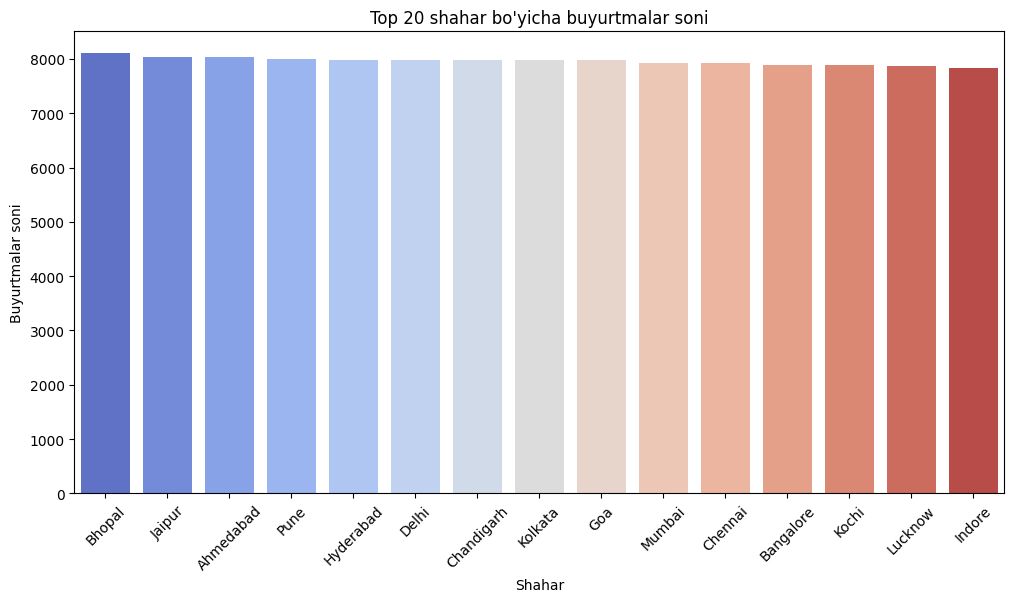

C:\maya_temp\ipykernel_412\3149970760.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=canceled_by_city.index, y=canceled_by_city.values, palette='Reds')


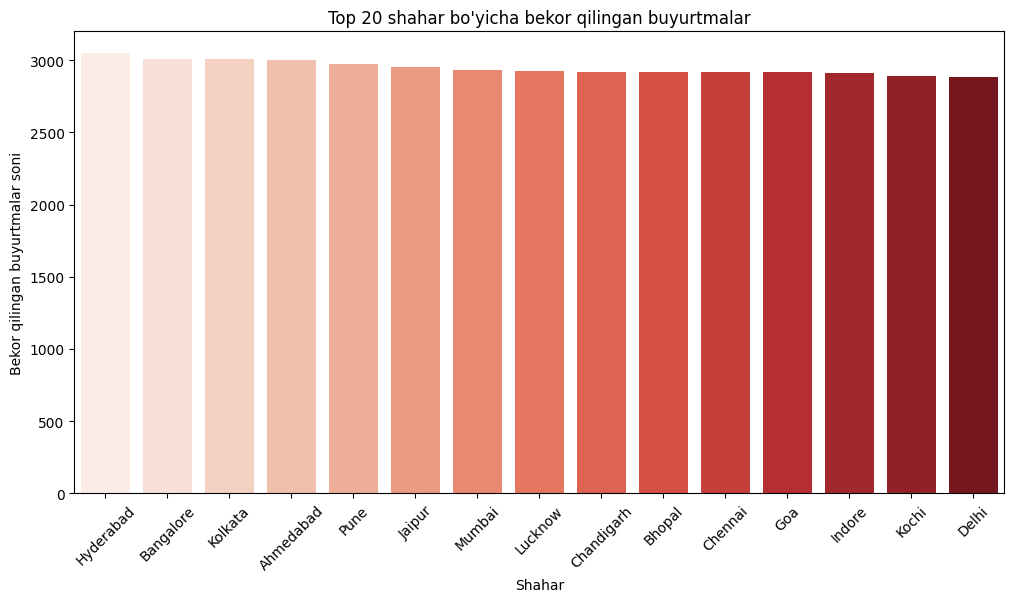

C:\maya_temp\ipykernel_412\3149970760.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_ratio.index, y=cancel_ratio.values*100, palette='Reds')


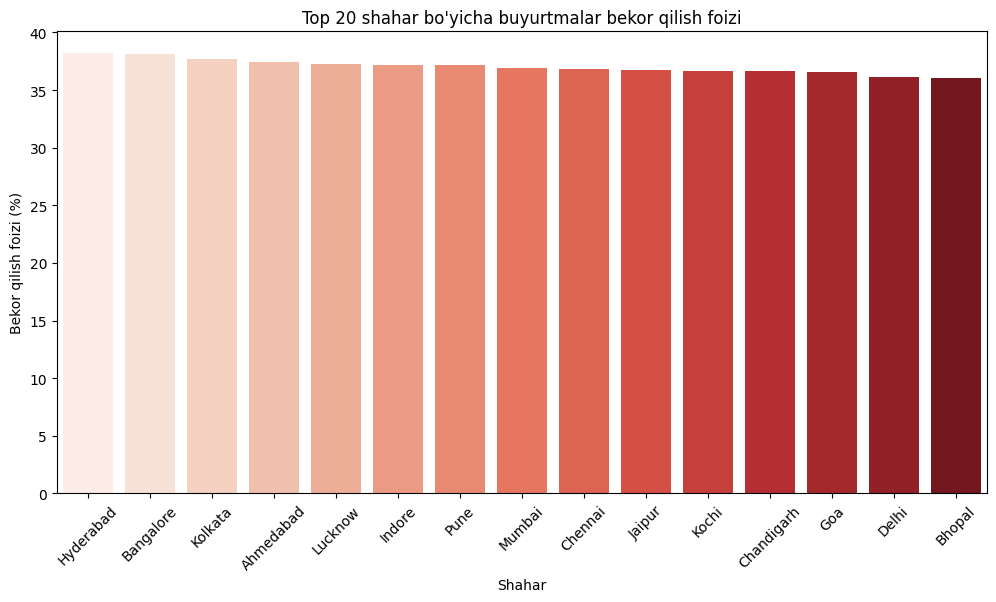

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Har bir shahar bo'yicha buyurtmalar soni
city_counts = df['city'].value_counts()
print("Shaharlar bo'yicha buyurtmalar soni:")
print(city_counts)

# Top 20 shaharni vizual ko'rsatish
top_cities = city_counts.head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 20 shahar bo'yicha buyurtmalar soni")
plt.ylabel("Buyurtmalar soni")
plt.xlabel("Shahar")
plt.show()

# Bekor qilingan buyurtmalarni shaharga ko'ra tahlil qilish
canceled_by_city = df[df['is_canceled'] == 1]['city'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=canceled_by_city.index, y=canceled_by_city.values, palette='Reds')
plt.xticks(rotation=45)
plt.title("Top 20 shahar bo'yicha bekor qilingan buyurtmalar")
plt.ylabel("Bekor qilingan buyurtmalar soni")
plt.xlabel("Shahar")
plt.show()

# Bekor qilish foizi
cancel_ratio = (df[df['is_canceled'] == 1].groupby('city').size() / df.groupby('city').size()).sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=cancel_ratio.index, y=cancel_ratio.values*100, palette='Reds')
plt.xticks(rotation=45)
plt.title("Top 20 shahar bo'yicha buyurtmalar bekor qilish foizi")
plt.ylabel("Bekor qilish foizi (%)")
plt.xlabel("Shahar")
plt.show()

# Target Distribution (is_canceled)

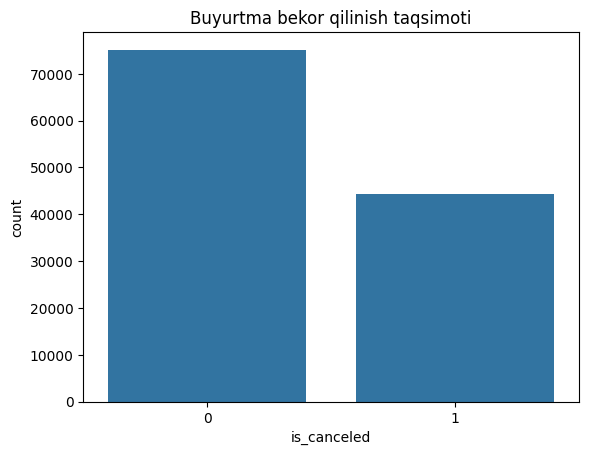

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
sns.countplot(x='is_canceled', data=df)
plt.title("Buyurtma bekor qilinish taqsimoti")
plt.show()

# Proportion
print(df['is_canceled'].value_counts(normalize=True))


# Mavsumiy tendensiyalarni aniqlash

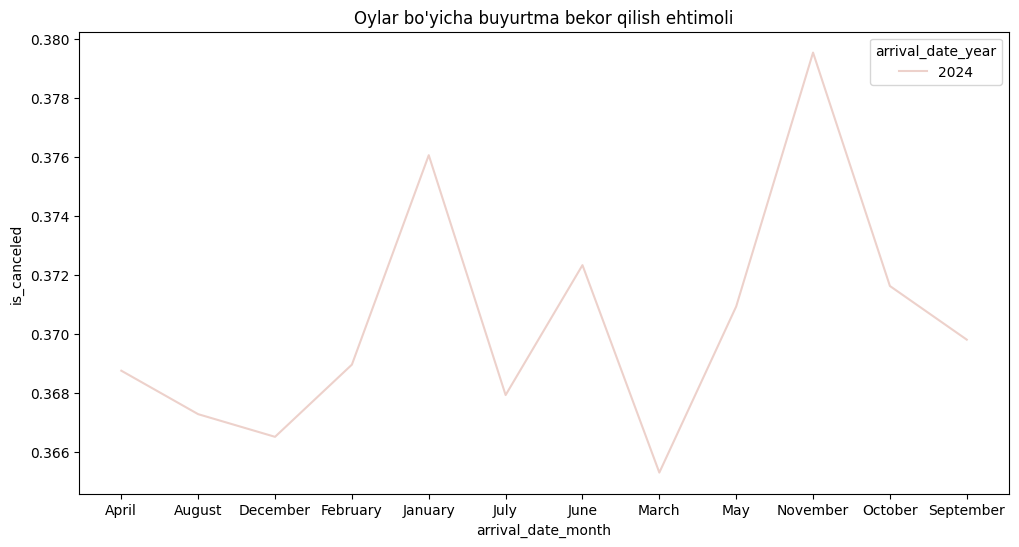

In [ ]:
monthly_cancel = df.groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='is_canceled', hue='arrival_date_year', data=monthly_cancel)
plt.title("Oylar bo'yicha buyurtma bekor qilish ehtimoli")
plt.show()
